In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks
import math

In [2]:
datafile = 'truecode-metrics-august-2023.csv'

SYMBOLS = [ 'Strategy', 'Bitcoin', 'SPX', 'NDX']

SYMBOL_COLORS = {
    'Strategy': '#CAB145',
    'Bitcoin': '#567DC5', 
    'SPX': '#dddddd', 
    'NDX': '#C0C0C0', 
}

SYMBOL_LINEWIDTH = {
    'Strategy': '4',
}


SYMBOLS, SYMBOL_COLORS, SYMBOL_LINEWIDTH


(['Strategy', 'Bitcoin', 'SPX', 'NDX'],
 {'Strategy': '#CAB145',
  'Bitcoin': '#567DC5',
  'SPX': '#dddddd',
  'NDX': '#C0C0C0'},
 {'Strategy': '4'})

In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-07-31')

In [4]:
# BITCOIN-FUND is Bitcoin metrics over the same time period as the Fund
# BITCOIN-COMBINED is Bitcoin metrics over the same time period as the combined Fund and Family Office Account
PITCH_DECK_METRICS = {
    'FUND': {},
    'COMBINED': {},
    'BITCOIN-FUND': {},
    'BITCOIN-COMBINED': {},
}

# Font Configuration

If you receive an exception for Roboto Condensed or Roboto, stop here and fix the font configuration.

In [5]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: line 146: blank doesn't take any effect anymore. please remove it from your fonts.conf


['/System/Library/Fonts/Avenir Next Condensed.ttc',
 '/System/Library/Fonts/Supplemental/PTSerif.ttc',
 '/Library/Fonts/KozGoPro-Medium.otf',
 '/Library/Fonts/Microsoft/Arial Bold Italic.ttf',
 '/Library/Fonts/Microsoft/Franklin Gothic Book.ttf',
 '/Library/Fonts/MyriadPro-BoldCondIt.otf',
 '/Users/jmp/Library/Fonts/RobotoCondensed-BoldItalic.ttf',
 '/Library/Fonts/MinionPro-BoldCnIt.otf',
 '/System/Library/Fonts/Supplemental/Hoefler Text.ttc',
 '/Library/Fonts/Microsoft/Verdana Bold.ttf',
 '/System/Library/Fonts/Supplemental/Copperplate.ttc',
 '/System/Library/Fonts/Monaco.ttf',
 '/Library/Fonts/KozGoPro-Heavy.otf',
 '/System/Library/Fonts/NotoSansMyanmar.ttc',
 '/Library/Fonts/Microsoft/Cambria Math.ttf',
 '/Library/Fonts/ChaparralPro-Regular.otf',
 '/System/Library/Fonts/Supplemental/Sana.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf',
 '/Library/Fonts/MinionPro-Bold.otf',
 '/System/Library/Fonts/SFNSMono.ttf',
 '/Library/Fonts/Microsoft/taile.ttf',
 '/Syste

In [6]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

'/Users/jmp/Library/Fonts/Roboto-Regular.ttf'

# Configure Charts

In [7]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 2,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [8]:
prices = pd.read_csv(datafile)
print(prices)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

            Date    Strategy     Bitcoin         SPX         NDX
0     12/19/2019 10,000.0000 10,000.0000 10,000.0000 10,000.0000
1     12/20/2019 10,036.1900 10,052.4900 10,000.0000 10,000.0000
2     12/21/2019  9,981.8100  9,975.4600 10,000.0000 10,000.0000
3     12/22/2019 10,342.4300 10,491.0800 10,000.0000 10,000.0000
4     12/23/2019 10,163.9500 10,233.2600 10,015.2800 10,026.3400
...          ...         ...         ...         ...         ...
1424         NaN         NaN         NaN         NaN         NaN
1425         NaN         NaN         NaN         NaN         NaN
1426         NaN         NaN         NaN         NaN         NaN
1427         NaN         NaN         NaN         NaN         NaN
1428         NaN         NaN         NaN         NaN         NaN

[1429 rows x 5 columns]


In [9]:
prices[['Strategy', 'Bitcoin', 'SPX', 'NDX']]

,Strategy,Bitcoin,SPX,NDX
Date,,,,
2019-12-19,"10,000.0000","10,000.0000","10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900","10,000.0000","10,000.0000"
2019-12-21,"9,981.8100","9,975.4600","10,000.0000","10,000.0000"
2019-12-22,"10,342.4300","10,491.0800","10,000.0000","10,000.0000"
2019-12-23,"10,163.9500","10,233.2600","10,015.2800","10,026.3400"
...,...,...,...,...
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


# Fund Statistics

In [10]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[SYMBOLS].calc_stats()

PITCH_DECK_METRICS['FUND']['Month to Date'] = stats['Strategy'].mtd
PITCH_DECK_METRICS['BITCOIN-FUND']['Month to Date'] = stats['Bitcoin'].mtd
PITCH_DECK_METRICS['FUND']['Year to Date'] = stats['Strategy'].ytd
PITCH_DECK_METRICS['BITCOIN-FUND']['Year to Date'] = stats['Bitcoin'].ytd
PITCH_DECK_METRICS['FUND']['CAGR'] = stats['Strategy'].cagr
PITCH_DECK_METRICS['BITCOIN-FUND']['CAGR'] = stats['Bitcoin'].cagr

stats.display()

Stat                 Strategy    Bitcoin     SPX         NDX
-------------------  ----------  ----------  ----------  ----------
Start                2022-05-01  2022-05-01  2022-05-01  2022-05-01
End                  2023-07-31  2023-07-31  2023-07-31  2023-07-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         -5.35%      -21.15%     13.43%      23.59%
Daily Sharpe         0.05        -0.04       0.49        0.63
Daily Sortino        0.07        -0.06       0.79        1.03
CAGR                 -4.31%      -17.33%     10.62%      18.49%
Max Drawdown         -32.35%     -59.64%     -16.68%     -21.65%
Calmar Ratio         -0.13       -0.29       0.64        0.85

MTD                  -7.45%      -4.07%      3.27%       3.86%
3m                   -18.33%     -0.00%      10.47%      19.11%
6m                   -15.54%     26.41%      13.48%      30.61%
YTD                  13.08%      76.71%      20.62%      44.51%
1Y                   -16.96%     25.

/Users/jmp/code/truecode_metrics/graph-returns-fund.pdf

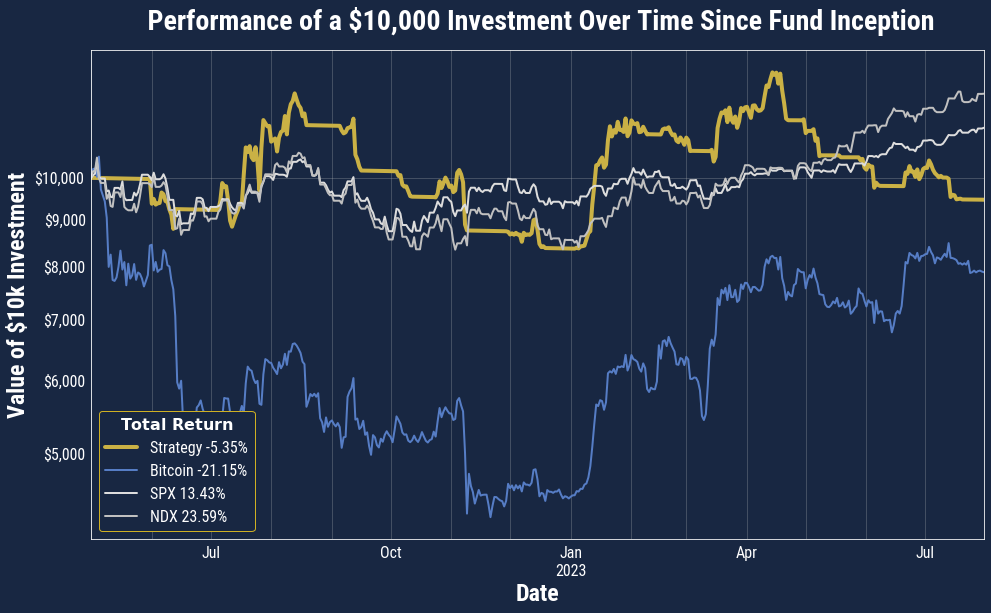

In [11]:
ax = sample[SYMBOLS].rebase(value=10000).plot.line(title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPX {:.2f}%'.format(total_returns['SPX'] * 100.), 
        'NDX {:.2f}%'.format(total_returns['NDX'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')
display(FileLink('graph-returns-fund.pdf'))



# Combined Family Office Account + Fund History Statistics

In [12]:
stats = prices[SYMBOLS].calc_stats()
PITCH_DECK_METRICS['COMBINED']['CAGR'] = stats['Strategy'].cagr
PITCH_DECK_METRICS['BITCOIN-COMBINED']['CAGR'] = stats['Bitcoin'].cagr
PITCH_DECK_METRICS['COMBINED']['Daily Sortino'] = stats['Strategy'].daily_sortino
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Daily Sortino'] = stats['Bitcoin'].daily_sortino
PITCH_DECK_METRICS['COMBINED']['Calmar'] = stats['Strategy'].calmar
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Calmar'] = stats['Bitcoin'].calmar
PITCH_DECK_METRICS['COMBINED']['Max Drawdown'] = stats['Strategy'].max_drawdown
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Max Drawdown'] = stats['Bitcoin'].max_drawdown
PITCH_DECK_METRICS['COMBINED']['Total Return'] = stats['Strategy'].total_return
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Total Return'] = stats['Bitcoin'].total_return

stats.display()

Stat                 Strategy    Bitcoin     SPX         NDX
-------------------  ----------  ----------  ----------  ----------
Start                2019-12-19  2019-12-19  2019-12-19  2019-12-19
End                  2023-07-31  2023-07-31  2023-07-31  2023-07-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         363.25%     314.99%     50.94%      85.69%
Daily Sharpe         1.03        0.77        0.50        0.62
Daily Sortino        1.74        1.23        0.75        0.96
CAGR                 52.84%      48.26%      12.07%      18.68%
Max Drawdown         -32.35%     -76.28%     -33.70%     -35.12%
Calmar Ratio         1.63        0.63        0.36        0.53

MTD                  -7.45%      -4.07%      3.27%       3.86%
3m                   -18.33%     -0.00%      10.47%      19.11%
6m                   -15.54%     26.41%      13.48%      30.61%
YTD                  13.08%      76.71%      20.62%      44.51%
1Y                   -16.96%     25.

/Users/jmp/code/truecode_metrics/graph-returns-all.pdf

Text(0.5, 0.98, 'Return Histogram Matrix')

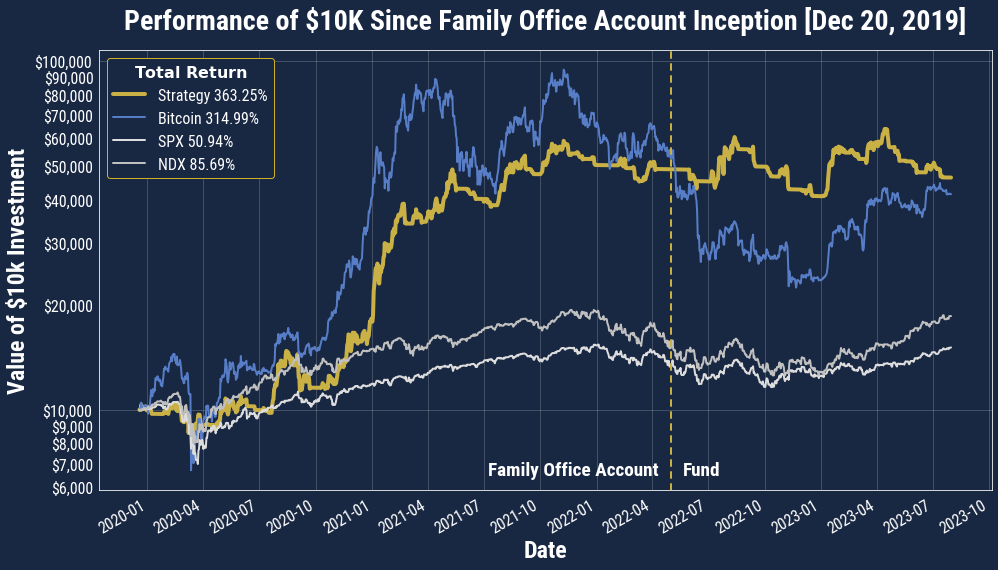

<Figure size 1152x648 with 0 Axes>

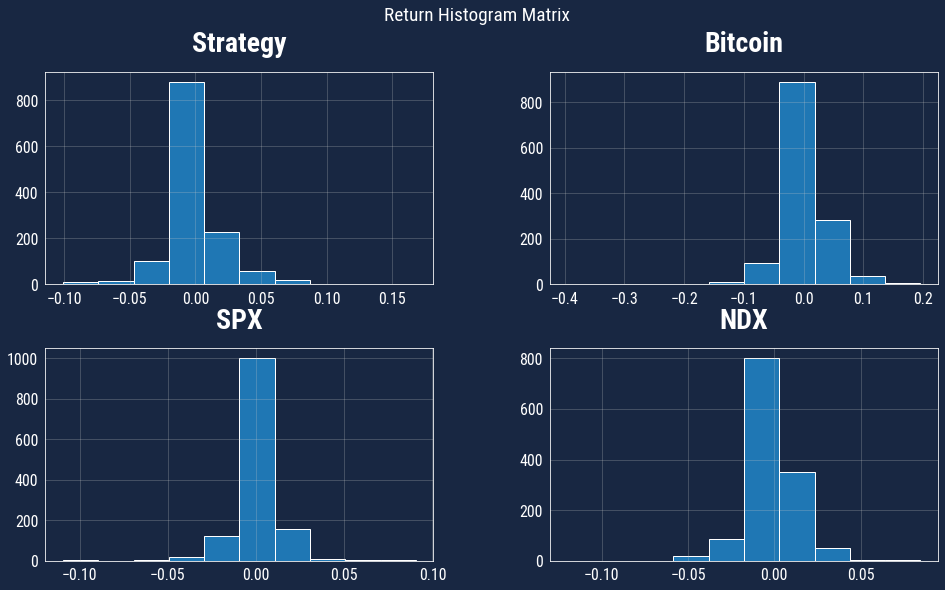

In [13]:
ax = prices[SYMBOLS].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = prices[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPX {:.2f}%'.format(total_returns['SPX'] * 100.), 
        'NDX {:.2f}%'.format(total_returns['NDX'] * 100.)
    ), 
    loc='upper left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')
display(FileLink('graph-returns-all.pdf'))

sample_stats.plot_histograms(figsize=(16, 9))

/Users/jmp/code/truecode_metrics/graph-returns-2022-bear-market.pdf

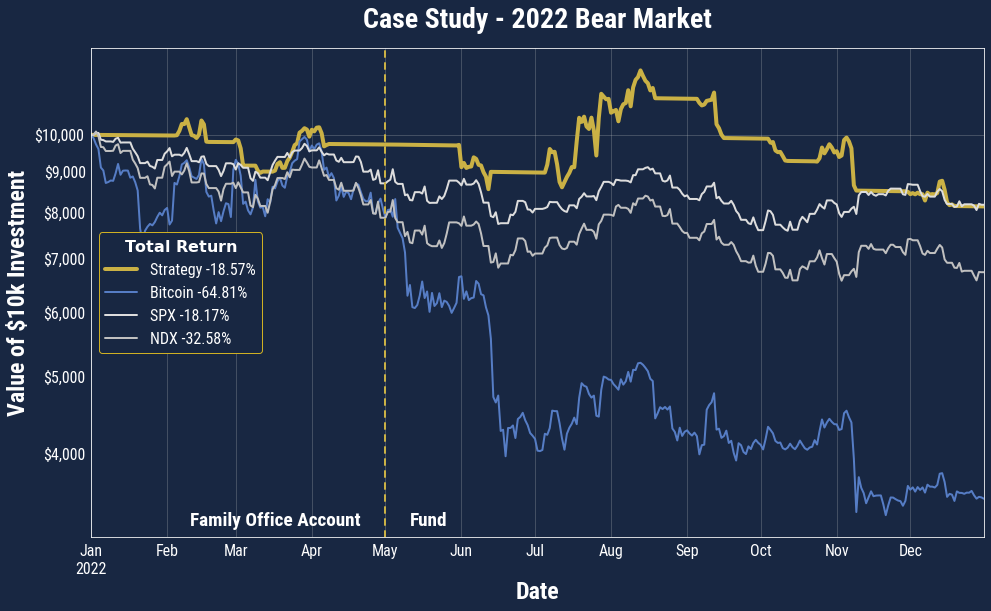

In [14]:
sample = prices[dt.fromisoformat('2022-01-01'):dt.fromisoformat('2022-12-31')]
rebased_sample = ffn.rebase(sample[SYMBOLS], value=10000)
ax = rebased_sample[SYMBOLS].plot.line(title='Case Study - 2022 Bear Market', logy=True, color=SYMBOL_COLORS, xlabel="Date", ylabel="Value of $10k Investment")
rebased_sample_stats = rebased_sample[SYMBOLS].calc_stats()

for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

total_returns = {}
for symbol in SYMBOLS:
    total_returns[symbol] = rebased_sample_stats[symbol].stats['total_return']
    
ax.legend(
    (
        'Strategy {:.2f}%'.format(total_returns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(total_returns['Bitcoin'] * 100.), 
        'SPX {:.2f}%'.format(total_returns['SPX'] * 100.), 
        'NDX {:.2f}%'.format(total_returns['NDX'] * 100.)
    ), 
    loc='center left', 
    title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=10), 3250,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=10), 3250,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-2022-bear-market.pdf', format='pdf')
display(FileLink('graph-returns-2022-bear-market.pdf'))


/Users/jmp/code/truecode_metrics/drawdowns.pdf

/Users/jmp/code/truecode_metrics/drawdowns.csv

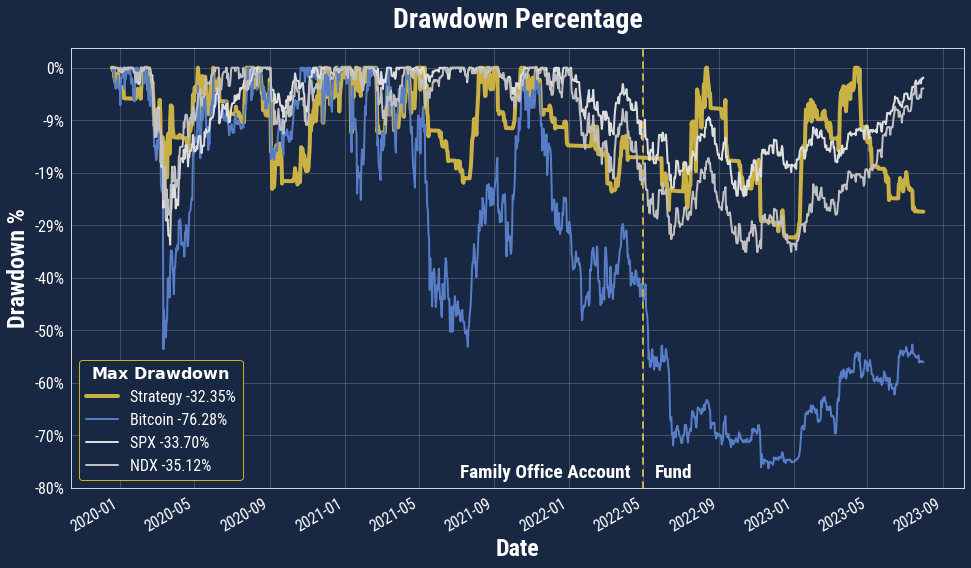

In [15]:
rebased_sample = ffn.rebase(prices[SYMBOLS], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(ylabel='Drawdown %', title='Drawdown Percentage', color=SYMBOL_COLORS)
rebased_drawdown_stats = rebased_sample[SYMBOLS].calc_stats()

# rebased_drawdown_stats.display()
for line in ax.get_lines():
    if 'Strategy' == line.get_label():
        line.set_linewidth(4)
        line.set_color(SYMBOL_COLORS['Strategy'])

max_drawdowns = {}
for symbol in SYMBOLS:
    max_drawdowns[symbol] = rebased_drawdown_stats[symbol].stats['max_drawdown']

ax.legend(
    (
        'Strategy {:.2f}%'.format(max_drawdowns['Strategy'] * 100.), 
        'Bitcoin {:.2f}%'.format(max_drawdowns['Bitcoin'] * 100.), 
        'SPX {:.2f}%'.format(max_drawdowns['SPX'] * 100.), 
        'NDX {:.2f}%'.format(max_drawdowns['NDX'] * 100.)
    ), 
    loc='lower left', 
    title=r'$\bf{Max\ Drawdown}$')

ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

fig.savefig('drawdowns.pdf')
display(FileLink('drawdowns.pdf'))

drawdowns.to_csv('drawdowns.csv')
display(FileLink('drawdowns.csv'))



In [16]:
# strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(pd.DataFrame.pct_change, freq='M')
strategy_monthly_returns = prices['Strategy'].pct_change(freq='M')

strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date
2019-12-19      NaN
2019-12-20      NaN
2019-12-21      NaN
2019-12-22      NaN
2019-12-23      NaN
              ...  
NaT          0.0000
NaT          0.0000
NaT          0.0000
NaT          0.0000
NaT          0.0000
Name: Strategy, Length: 1429, dtype: float64

# Calculate VaR

Bitcoin VaR = 0.05228899104589118
Strategy VaR = 0.02964108247147758


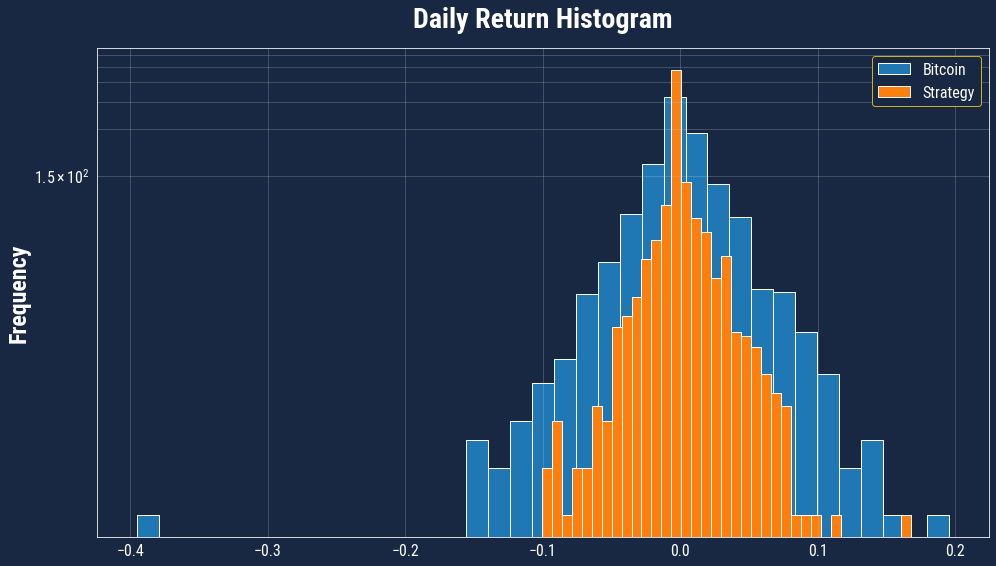

In [17]:
bitcoin_daily_returns = prices['Bitcoin'].pct_change(freq="D")
strategy_daily_returns = prices['Strategy'].pct_change(freq="D")

VaR_95_bitcoin = abs(bitcoin_daily_returns.quantile(0.05))
VaR_95_strategy = abs(strategy_daily_returns.quantile(0.05))

print('Bitcoin VaR =', VaR_95_bitcoin)
print('Strategy VaR =', VaR_95_strategy)

ax = bitcoin_daily_returns.plot(kind='hist', logy=True, legend=True, title='Daily Return Histogram', bins=int(math.sqrt(len(bitcoin_daily_returns))))
strategy_daily_returns.plot(kind='hist', logy=True, legend=True, bins=int(math.sqrt(len(strategy_daily_returns))))

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

PITCH_DECK_METRICS['COMBINED']['VaR (95%)'] = VaR_95_strategy
PITCH_DECK_METRICS['BITCOIN-COMBINED']['VaR (95%)'] = VaR_95_bitcoin


# Calculate Correlation

In [18]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.6324
Bitcoin,0.6324,1.0000


In [19]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
PITCH_DECK_METRICS['COMBINED']['Correlation to BTC'] = strategy_corr
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Correlation to BTC'] = 1.0
print("Strategy Correlation = {:.4}".format(strategy_corr))

Strategy Correlation = 0.6324


# Calculate Volatility & Beta

In [20]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
PITCH_DECK_METRICS['COMBINED']['Volatility'] = strategy_vol
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Volatility'] = benchmark_vol
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

Strategy Volatility = 0.8766
Bitcoin Volatility = 1.523


# Calculate Beta

In [21]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
PITCH_DECK_METRICS['COMBINED']['Beta'] = beta
PITCH_DECK_METRICS['BITCOIN-COMBINED']['Beta'] = 1.0
print("Strategy Beta = {:.4}".format(beta))

Strategy Beta = 0.364


# Dump Metrics to Centralized File

In [22]:
pdmdf = pd.DataFrame(PITCH_DECK_METRICS)
pdmdf.transpose().to_csv('pitch_deck_metrics.csv')
pdmdf.transpose()

,Month to Date,Year to Date,CAGR,Daily Sortino,Calmar,Max Drawdown,Total Return,VaR (95%),Correlation to BTC,Volatility,Beta
FUND,-0.0745,0.1308,-0.0431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMBINED,NaN,NaN,0.5284,1.7392,1.6336,-0.3235,3.6325,0.0296,0.6324,0.8766,0.3640
BITCOIN-FUND,-0.0407,0.7671,-0.1733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BITCOIN-COMBINED,NaN,NaN,0.4826,1.2326,0.6327,-0.7628,3.1499,0.0523,1.0000,1.5230,1.0000
